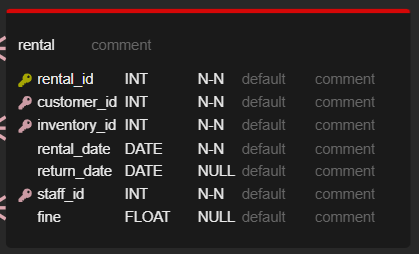

In [94]:
import pandas as pd
import numpy as np
import datetime
from datetime import date, datetime, timedelta
import random
from dateutil.relativedelta import relativedelta
import faker
import seaborn as sns

# TABELA  - CUSTOMER

In [95]:
fake = faker.Faker('pl_PL')

In [96]:
n = 600
start_date = date(2021,1,4)
end_date = date(2023,6,15)
days_number = (end_date - start_date).days

def get_dates_between():
    return [start_date + timedelta(days = i) for i in range(days_number)]



def prawdopodobienstwa_rejestracja():
    n = days_number
    series = []

    for i in range(n - 1):
        xi = random.uniform(0, 1)
        series.append(xi)

    series.sort(reverse=True)  # Sortowanie malejące
    scaling_factor = 1 / sum(series)
    series = [x * scaling_factor for x in series]

    remaining_sum = abs(1 - sum(series))  # tu teoretycznie przekrocze 1 w wektorze prawd ale na dalekim miejscu po przecinku
    series.append(remaining_sum)

    return series

In [97]:
country_probabilities = [0.78, 0.08, 0.04, 0.1]
email_endings_pl = ["@gmail.com", "@wp.pl", "@o2.pl", "@live.com"]
email_endings_de = ["@gmail.com", "@web.de", "@gmx.net", "@live.com"]
email_endings_cs = ["@gmail.com", "@szn.cz", "live.com"]
email_endings_uk = ["@gmail.com", "@mail.ru", "@live.com"]


def generate_customer():
    countries = ["Poland", "Germany", "Czech Republic", "Ukraine"]
    country = random.choices(countries, weights=country_probabilities)[0]
    
    if country == "Poland":
        fake = faker.Faker('pl_PL')
        if random.random() < 0.5:
            x = fake.first_name_female()
            y = fake.last_name_female()
            email = generate_email(x, y) + random.choice(email_endings_pl)
            return x, y, email
        else:
            x = fake.first_name_male()
            y = fake.last_name_male()
            email = generate_email(x, y) + random.choice(email_endings_pl)
            return x, y, email
        
    elif country == "Germany":
        fake = faker.Faker('de_DE')
        if random.random() < 0.5:
            x = fake.first_name_female()
            y = fake.last_name_female()
            email = generate_email(x, y) + random.choice(email_endings_de)
            return x, y, email
        else:
            x = fake.first_name_male()
            y = fake.last_name_male()
            email = generate_email(x, y) + random.choice(email_endings_de)
            return x, y, email
        
    elif country == "Czech Republic":
        fake = faker.Faker('cs_CZ')
        if  random.random() < 0.5:
            x = fake.first_name_female()
            y = fake.last_name_female()
            email = generate_email(x, y) + random.choice(email_endings_cs)
            return x, y, email
        else:
            x = fake.first_name_male()
            y = fake.last_name_male()
            email = generate_email(x, y) + random.choice(email_endings_cs)
            return x, y, email
        
    elif country == "Ukraine":
        fake = faker.Faker('uk_UA')
        if  random.random() < 0.5:
            x = fake.first_name_female()
            y = fake.last_name_female()
            email = generate_email(x, y) + random.choice(email_endings_uk)
            return x, y, email
        else:
            x = fake.first_name_male()
            y = fake.last_name_male()
            email = generate_email(x, y) + random.choice(email_endings_uk)
            return x, y, email

        

def generate_email(first_name, last_name):
    if " " in first_name:
        first_name = first_name.split(" ")[0] 
    email = first_name[0 : random.randint(2, len(first_name)-1)] + last_name[0 : random.randint(2, len(last_name)-1)] 
    email += str(random.choices(['', random.randint(0,100)], weights=[0.4,0.6])[0])
    return email

In [98]:
registration_dates = [start_date]*15 + [start_date + timedelta(days = 1)]*10 + [start_date + timedelta(days = 2)]*5 + [random.choices(get_dates_between(), weights=prawdopodobienstwa_rejestracja())[0] for _ in range(n-30)]
random.shuffle(registration_dates)


customers = {
    
    'first_name': ["s" for _ in range(n)],
    'last_name': ["a" for _ in range(n)],
    'birthdate': [fake.date_of_birth(minimum_age=13, maximum_age=80) for _ in range(n)],
    'email': ["s" for _ in range(n)],
    'phone': [random.randint(100000000,999999999) for _ in range(n)],
    'address_id': [_ for _ in range(n)],
    'registration_date': registration_dates
}

df_customers = pd.DataFrame(customers)

for i in range(n):
    df_customers.at[i,"first_name"], df_customers.at[i,"last_name"], df_customers.at[i,"email"] = generate_customer()
    
df_customers["address_id"] = random.sample([i for i in range(n)], n)
    
df_customers

,first_name,last_name,birthdate,email,phone,address_id,registration_date
0,Melania,Husak,1991-10-30,MelHusa@live.com,102078521,34,2021-01-26
1,Rozalia,Brózda,2009-02-04,RozBrózd71@live.com,845372494,319,2022-11-11
2,Marek,Štěpánek,1947-02-10,MareŠtěpá88live.com,445401196,154,2022-03-21
3,Dursun,Kabus,1964-07-22,DursuKab87@web.de,314030605,295,2021-09-20
4,Dagmara,Aleksander,1951-06-08,DaAle@gmail.com,686573901,161,2021-05-09
...,...,...,...,...,...,...,...
595,Daniel,Jamrożek,1965-03-26,DaJamroż91@wp.pl,338011921,321,2021-07-16
596,Gaja,Wypiór,1969-09-10,GajWy3@gmail.com,488403317,268,2021-09-30
597,Janina,Eckert,2010-05-01,JaEc@gmail.com,214102561,375,2021-10-20
598,Dorota,Irzyk,2001-05-29,DoIr@o2.pl,257858837,122,2021-11-15


In [99]:
df_customers = df_customers.sort_values(by="registration_date")
df_customers['customer_id'] = [_+1 for _ in range(n)]

<AxesSubplot:xlabel='registration_date', ylabel='Count'>

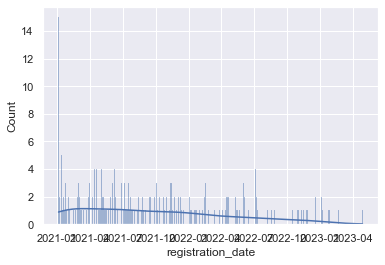

In [7]:
sns.set(rc={"figure.figsize": (19,10)})
sns.histplot(df_customers.sort_values(by="registration_date")["registration_date"], kde=True)

# TABELA - RENTAL

In [100]:
#zAŁOŻENIA
    # 1. osoba moze wypozyczyc gre adekwatną do swojego wieku
    # 2. nie mozna wypozyczyc gry ktora nie zostala jeszcze oddana
    # 3. return date bedzie pomiedzy rental_date a rental_date + tydzien z pr np 0.7 a rental_date + tdyzien + np 5 dni z pr 0.3
    # 4. staff_id - jesli rental_date to niedziela to staff_id to 1
    # 5. dla vipow mamy 10% znizki od ceny wypozyczenia
    # 6. osoba moze wypozyczyc gre po terminie zarejestrowania sie w sklepie
    # 7. w swieta sklep zamykamy
    # 8. kazdy dzien spoznienia w oddaniu (max tydzien) to + 1/10 ceny wypozyczenia
    # 9. czas wypozyczenia to 1 tydzień, 1 dzien opoznienia to 1/10 ceny wypozyczenia
    #10. zakladamy okolo 35 wypozyczen dziennie co daje lacznie okolo 19 tysiecy (powiedzmyze 19241)

In [101]:
inventory_rent = pd.read_csv('inventory_rent.csv')
customer = df_customers
games = pd.read_csv('game.csv')

In [102]:
def days_from_last_rent(return_date):
    diff_date = (return_date - date(2021, 1, 4)).days
    x = 0.6 / (1+np.e**(-0.01005*(diff_date-300)))
    possible_days = [0, np.random.randint(1,9), np.random.randint(10,21), np.random.randint(22,41), 
                     np.random.randint(42, 120)]
    prob = [0.02, x, 0.75-3*x/4, 0.22-x/4, 0.01]
    
    return int(np.random.choice(possible_days, p = prob))

In [103]:
# 0 bo moga przyjsc pograc na miejscu i od razu oddac
def rent_days():
    possible_days = [0, np.random.randint(1,8), np.random.randint(8,14), np.random.randint(15,31),
                     np.random.randint(31, 61), np.random.randint(61, 121), np.random.randint(121, 672)]
    prob = [0.2, 0.5, 0.2, 0.05, 0.03, 0.017, 0.003]
    return int(np.random.choice(possible_days, p = prob))

In [104]:
inventory_id = inventory_rent['inventory_id']

In [105]:
def create_rental():
    rental = pd.DataFrame(columns = ['inventory_id', 'rental_date', 'return_date', 'game_id'])
    for i in inventory_id:
        return_date = date(2021, 1, 4)
        
        while return_date < date(2023, 6, 15):
            rental_date = return_date +  timedelta(days = days_from_last_rent(return_date))
            return_date = rental_date + timedelta(days = rent_days())
            if rental_date <= date(2023, 6, 15):
                if return_date > date(2023, 6, 15):
                    new_return_date = None
                    new_row = {'inventory_id' : i, 'rental_date' : rental_date, 'return_date' : new_return_date,
                               'game_id' : int(inventory_rent.loc[inventory_rent['inventory_id'] == i, 'game_id'].values)}
                    rental.loc[len(rental)] = new_row
                else:
                    new_row = {'inventory_id' : i, 'rental_date' : rental_date, 'return_date' : return_date,
                              'game_id' : int(inventory_rent.loc[inventory_rent['inventory_id'] == i, 'game_id'].values)}
                    rental.loc[len(rental)] = new_row
    return rental

In [106]:
rental = create_rental()

In [107]:
rental['rental_date'] = pd.to_datetime(rental['rental_date'])
rental['return_date'] = pd.to_datetime(rental['return_date'])
rental = rental.sort_values(by='rental_date')

In [108]:
n_id = len(rental)
n_id

20380

In [109]:
rental['rental_id'] = np.arange(1, n_id+1)
rental = rental.iloc[:,[4,0,1,2,3]]

## customer_id

In [110]:
cst_id = []
for i in range(0, len(rental)):
    cont = True
    while cont:
        customer_id = random.choice(np.arange(1, len(customer)+1)) 
        wiek = relativedelta(rental.iloc[i]['rental_date'], customer['birthdate'][customer_id-1], '%Y-%m-%d').years
        if (wiek > games.loc[games['game_id'] == rental.iloc[i]['game_id'], 'age'].values and 
            customer['registration_date'][customer_id-1] <= rental.iloc[i]['rental_date'].date()):
            cst_id.append(customer_id)
            break
        else:
            continue

In [111]:
rental['customer_id'] = cst_id

## staff_id

In [112]:
staff = pd.read_csv('staff.csv')
staff.head()

,Unnamed: 0,staff_id,first_name,last_name,salary,birth_date,start,phone,address_id,email
0,0,1,Tomasz,Stroiński,5000,1995-01-01,2021-01-04,923128647,1,t.stroinski@geeksdragons.com
1,1,2,Wiktoria,Fimińska,3500,2001-02-02,2021-01-20,756837957,2,w.fiminska@geeksdragons.com
2,2,3,Karolina,Wypych,3500,2001-09-03,2021-04-08,567938928,3,k.wypych@geeksdragons.com
3,3,4,Julia,Grzegorzewska,3500,2001-09-03,2021-11-26,566552356,4,j.grzegorzewska@geeksdragons.com
4,4,5,Mateusz,Stasiak,3500,2001-10-15,2022-02-07,666555827,5,m.stasiak@geeksdragons.com


In [113]:
free_days = ['2023-01-01', '2023-01-06', '2023-04-09', '2023-04-10', '2023-05-01', '2023-05-03', '2023-05-28', '2023-06-08',
            '2022-01-01', '2022-01-06', '2022-04-17', '2022-04-18', '2022-05-01', '2022-05-03', '2022-06-05', '2022-06-16',
            '2022-08-15', '2022-11-01', '2022-11-11', '2022-12-25', '2022-12-26', '2021-01-06', '2021-04-04', '2021-04-05',
            '2021-05-01', '2021-05-03', '2021-05-23', '2021-06-03', '2021-08-15', '2021-11-01', '2021-11-11', '2021-12-25',
            '2021-12-26']

In [114]:
start_date = datetime(2021, 1, 4)
end_date = datetime(2023, 6, 15)
def generate_dates(start_date, end_date):
    current_date = start_date
    while current_date <= end_date:
        yield current_date
        current_date += timedelta(days=1)
all_dates = generate_dates(start_date, end_date)

In [115]:
def who_works(days):
    days = generate_dates(start_date, end_date)
    staff_id = {}
    for day in days:
        if day.weekday() == 6 or day < datetime(2021, 1, 20) or str(day) in free_days:
            ids = [1]
        elif day >= datetime(2022, 2, 7):
            ids = random.sample([1, 2, 3, 4, 5], random.choice([1, 2, 3]))
        elif datetime(2022, 2, 7) > day >= datetime(2021, 11, 26):
            ids = random.sample([1, 2, 3, 4], random.choice([1, 2, 3]))
        elif datetime(2021, 11, 26) > day >= datetime(2021, 4, 8):
            ids = random.sample([1, 2, 3], random.choice([1, 2]))
        elif datetime(2021, 4, 8) > day >= datetime(2021, 1, 20):
            ids = random.sample([1, 2], random.choice([1, 2]))
        staff_id[day] = ids
    return staff_id

In [116]:
staff_dates = who_works(all_dates)

In [117]:
staff_id = []
for i in range(0, len(rental)):
    staff_id.append(random.choice(staff_dates[rental.iloc[i]['rental_date']]))

In [118]:
rental['staff_id'] = staff_id

# TABELA - CUSTOMER (VIP)

In [119]:
temp = {
    'customer_id': [i+1 for i in range(n)],
    'count': [0]*n
}

df_temp = pd.DataFrame(temp)

df_temp
    
for i in range( len(rental) ):
    client_id = rental["customer_id"][i]
    
    df_temp.at[client_id - 1,"count"] = df_temp["count"][client_id- 1] + 1
    
    if df_temp["count"][client_id-1] == 10:
        df_temp.at[client_id-1,"date"] = rental["return_date"][i]

In [120]:
df_customers["VIP"] = df_temp["date"]
df_customers

,first_name,last_name,birthdate,email,phone,address_id,registration_date,customer_id,VIP
452,Ida,Daraż,1987-06-03,IdDara@o2.pl,312326160,423,2021-01-04,1,2021-02-19
473,Sara,Smagacz,1958-04-28,SaSm@o2.pl,695203223,311,2021-01-04,2,2021-09-07
330,Antoni,Kielczyk,1985-03-30,AntonKielczy42@o2.pl,501502971,49,2021-01-04,3,2023-06-05
298,Julian,Hyjek,1956-05-26,JulHyje76@gmail.com,223781981,548,2021-01-04,4,2023-04-03
564,Łukasz,Durma,1972-11-18,ŁukasDur@live.com,208420032,24,2021-01-04,5,2022-04-17
...,...,...,...,...,...,...,...,...,...
156,Marcel,Cheba,1949-04-16,MarcChe70@o2.pl,273197986,29,2023-02-23,596,NaT
144,Romuald,Lorch,1995-09-30,RomuLo@web.de,737284237,382,2023-02-28,597,NaT
327,Rafał,Danisz,1990-08-20,RafDan46@o2.pl,477272520,46,2023-03-13,598,NaT
263,Blanka,Mueller,1996-08-04,BlankMuelle@gmail.com,739202265,130,2023-03-17,599,NaT


# TABELA - RENTAL - price, fine

In [25]:
#jak vip to 10% znizki
#cena wypozyczenia to normalna cena + 10% znizki jesli vip + kara za opoznienei w oddaniu (kara w osobnej kolumnie)

In [123]:
games_buy_prices = {
    '1': 164.5,
    '2' : 65.00,
    '3' : 158.70,
    '4' : 170.32,
    '5' : 139.90,
    '6' : 119.19,
    '7' : 182.55,
    '8' : 179.90,
    '9': 409.95,
    '10' : 269.90,
    '11' : 59.90,
    '12' : 169.90,
    '13' : 479.00,
    '14' : 169.00,
    '15' : 42.38,
    '16' : 100.00,
    '17' : 39.90,
    '18' : 62.50,
    '19' : 199.99,
    '20' : 112.89,
    '21': 650.00,
    '22' : 219.00,
    "23" : 25.50,
    '24' : 188.65, 
    '25' : 56.60,
    '26' : 350.00,
    '27' : 74.99,
    '28' : 129.99,
    '29' : 289.00,
    '30' : 277.80,
    '31' : 120.00,
    '32' : 115.60,
    '33' : 158.95,
    '34' : 28.00,
    '35' : 162.55,
    '36' : 185.2,
    '37' : 46.50,
    '38' : 239.90,
    '39' : 37.00,
    '40' : 103.00,
    '41' : 28.80,
    '42' : 120.00,
    '43' : 56.70,
    '44' : 79.90,
    '45' : 117.97,
    '46' : 25.60,
    '47' : 16.70,
    '48' : 180.00,
    '49' : 115.60,
    '50' : 133.20
}

In [124]:
divide_by = 15

In [125]:
games_rent_prices_dict = {game_id: round(buy_price/divide_by, 2) for game_id, buy_price in games_buy_prices.items()}

In [126]:
games_rent_prices = pd.DataFrame(games_rent_prices_dict.items(), columns=['game_id', 'rent_price'])

In [127]:
#jesli nie jest vipem (nan) albo jesli data wypozyczenia < vip to normalna cena

In [137]:
main_price = []
for i in range(0, len(rental)):
    if pd.isnull(df_customers.loc[df_customers['customer_id'] == rental.iloc[i]['customer_id'], 'VIP'].values[0]):
        main_price.append(games_rent_prices.loc[games_rent_prices['game_id'] == str(rental.iloc[i]['game_id']), 'rent_price'].values[0])
    elif df_customers.loc[df_customers['customer_id'] == rental.iloc[i]['customer_id'], 'VIP'].values[0] > np.datetime64(rental.iloc[i]['rental_date']):
        main_price.append(games_rent_prices.loc[games_rent_prices['game_id'] == str(rental.iloc[i]['game_id']), 'rent_price'].values[0])
    else:
        main_price.append(games_rent_prices.loc[games_rent_prices['game_id'] == str(rental.iloc[i]['game_id']), 'rent_price'].values[0] * 0.9)

In [138]:
rental['price'] = main_price

## fine

In [140]:
fine = []
for i in range(0, len(rental)):
    if pd.isnull(rental.iloc[i]['return_date']):
        fine.append(None)
    elif relativedelta(rental.iloc[i]['return_date'],rental.iloc[i]['rental_date'],  '%Y-%m-%d').days <= 7:
        fine.append(0)
    else:
        delay_days = relativedelta(rental.iloc[i]['return_date'],rental.iloc[i]['rental_date'],  '%Y-%m-%d').days - 7
        fine.append(round(delay_days * 0.1 * rental.iloc[i]['price'], 2))

In [141]:
rental['fine'] = fine

In [143]:
rental.to_csv('rental.csv')

In [145]:
df_customers.to_csv("customer.csv", index=False)